In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data
data = load_breast_cancer()
X = data.data  # Shape: (569, 30) - features
y = data.target  # Shape: (569,) - binary labels (0 or 1)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


# Add intercept column
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

print("X_train shape after adding intercept:", X_train.shape)
print("X_test shape after adding intercept:", X_test.shape)

X_train shape after adding intercept: (455, 31)
X_test shape after adding intercept: (114, 31)


## Sigmoid Function  (1/1 exp(teta.T(x)))

In [2]:
def compute_hypothesis(X, params):
    z = np.dot(X, params)
    # Clip z to avoid overflow in exp
    z = np.clip(z, -500, 500)
    predictions = 1 / (1 + np.exp(-z))
    return predictions

### Classes Predicitons

In [3]:
def predict_classes(predictions):
    return (predictions >= 0.5).astype(int)

### Calculate Accuracy

In [4]:
def calculate_accuracy(class_predictions, actual):
    return np.mean(class_predictions == actual) * 100

## Cost Function with regularization

In [8]:
def compute_cost(X, y, params, lambda_reg = 0.1, reg_type = 'ridge'):
    m = len(y)
    predictions = compute_hypothesis(X, params)
    # avoid log(0)
    log_pred = np.log(predictions + 1e-15)
    log_one_minus_pred = np.log(1 - predictions + 1e-15)
    log_loss = -np.mean(y * log_pred + (1 - y) * log_one_minus_pred)

    # regularization
    if reg_type == 'ridge':
        reg_term = lambda_reg * np.sum(params[1:]**2)
    elif reg_type == 'lasso':
        reg_term = lambda_reg * np.sum(np.abs(params[1:])) #L1
    else:
        reg_term = 0 
    return log_loss + reg_term


## Gradient Descent

In [9]:
def gradient_descent(X,y, learning_rate=0.000001, iterations=1000, lambda_reg=0.1, reg_type= 'ridge', tolerance=1e-6):
    m, n_features = X.shape
    params = np.zeros(n_features)
    costs = []
    accuracies = []
    for i in range (iterations):
        predictions = compute_hypothesis(X, params)
        class_predictions = predict_classes(predictions)
        accuracies.append(calculate_accuracy(class_predictions, y))
        cost = compute_cost(X, y, params,lambda_reg, reg_type)
        costs.append(cost)
        errors = predictions - y 
        gradient = np.dot(X.T, errors) / m 

        if reg_type == 'ridge':
            reg_gradient = np.concatenate(([0], 2 * lambda_reg * params[1:]))
        elif reg_type == 'lasso':
            reg_gradient = np.concatenate(([0], lambda_reg * np.sign(params[1:])))
        else:
            reg_gradient = np.zeros(n_features)
        gradient += reg_gradient / m 
        new_params = params - learning_rate * gradient

        if np.all(np.abs(new_params - params) < tolerance):
            print(f"Converged after {i+1} iterations")
            break
        params = new_params
    return params, costs, accuracies

In [10]:
# Train and evaluate
lambda_reg = 0.1
iterations = 1000
learning_rate = 0.000001

In [11]:
# Ridge
params_ridge, costs_ridge, accuracies_ridge = gradient_descent(X_train, y_train, learning_rate, iterations, lambda_reg, 'ridge')
predictions_ridge = compute_hypothesis(X_test, params_ridge)
predicted_classes_ridge = predict_classes(predictions_ridge)
accuracy_ridge = calculate_accuracy(predicted_classes_ridge, y_test)

# Lasso
params_lasso, costs_lasso, accuracies_lasso = gradient_descent(X_train, y_train, learning_rate, iterations, lambda_reg, 'lasso')
predictions_lasso = compute_hypothesis(X_test, params_lasso)
predicted_classes_lasso = predict_classes(predictions_lasso)
accuracy_lasso = calculate_accuracy(predicted_classes_lasso, y_test)


In [12]:
# Print results
print("\nRidge Regression Results:")
print(f"Final training cost: {costs_ridge[-1]:.4f}")
print(f"Final training accuracy: {accuracies_ridge[-1]:.2f}%")
print(f"Test accuracy: {accuracy_ridge:.2f}%")

print("\nLasso Regression Results:")
print(f"Final training cost: {costs_lasso[-1]:.4f}")
print(f"Final training accuracy: {accuracies_lasso[-1]:.2f}%")
print(f"Test accuracy: {accuracy_lasso:.2f}%")



Ridge Regression Results:
Final training cost: 0.4614
Final training accuracy: 90.33%
Test accuracy: 92.98%

Lasso Regression Results:
Final training cost: 0.4650
Final training accuracy: 90.33%
Test accuracy: 92.98%


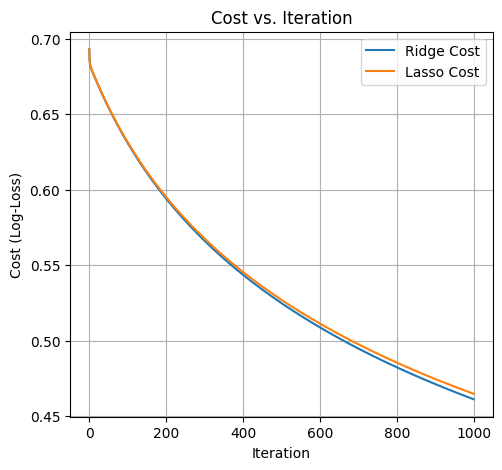

In [13]:
# Plot cost and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(costs_ridge, label='Ridge Cost')
plt.plot(costs_lasso, label='Lasso Cost')
plt.xlabel('Iteration')
plt.ylabel('Cost (Log-Loss)')
plt.title('Cost vs. Iteration')
plt.legend()
plt.grid(True)

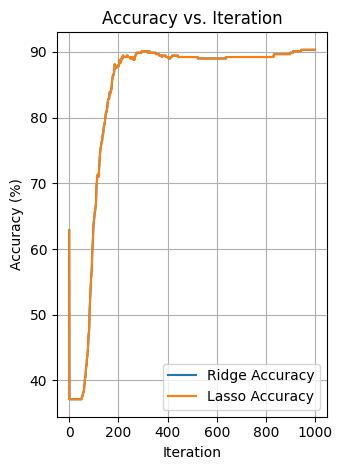

In [14]:
plt.subplot(1, 2, 2)
plt.plot(accuracies_ridge, label='Ridge Accuracy')
plt.plot(accuracies_lasso, label='Lasso Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Iteration')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('training_plots.png')